# Spin-Orbit Nanowire
I will use this notebook to model the Hamiltonian of a nanowire with an axial magnetic field and spin-orbit coupling. 

In [230]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

from matplotlib.colors import LogNorm

In [33]:
def calc_Hamiltonian(params):
    '''
    params will be a dict with the following information:
        N_z : number of points in z direction
        t : tight binding parameter
        mu : chemical potential (assumed to be same across the device)
        alpha : spin-orbit coupling energy
        V_x : Zeeman strength 
    '''
    N_z = params["N_z"]
    t = params['t']
    mu = params['mu']
    alpha = params['alpha']
    V_x = params['V_x']
    
    def is_neighbour(e1,e2):
        if abs(e1 - e2) == 1:
            return True
        else:
            return False
        
    def calc_H_element(e1,e2):
        '''
        Returns the matrix element between positions e1 and e2
        '''
        if e1 == e2:
            return np.array([[2*t-mu,V_x],[V_x,2*t - mu]])
        elif is_neighbour(e1,e2):
            return np.array([[-t,1j*alpha],[-1j*alpha,-t]])
        else:
            return np.zeros((2,2))
        
    basis = np.arange(N_z)
    H_full = np.array([calc_H_element(e1,e2) for e1 in basis for e2 in basis])
    # 2 comes from the length of the basis of the internal dimension
    H = np.transpose(H_full.reshape(len(basis),len(basis),2,2),(0,2,1,3)).reshape(2*len(basis),2*len(basis))
    
    return H 

In [102]:
params = {
    'N_z' : 20,
    't' : 1.0,
    'mu' : 2.0,
    'alpha' : 0,
    'V_x' : 0
}

H = calc_Hamiltonian(params)

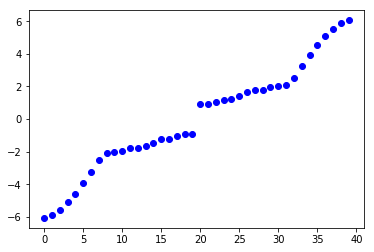

In [93]:
u,v = np.linalg.eig(H)
plt.plot(np.sort(np.real(u)),'bo')

In [243]:
def calc_direct_dos(E,H,eta=1e-8):
    '''
    Calcuates the density of states using trace((E + 1j*eta - H)^-1) vs E
    '''
    G = np.linalg.inv((E+1j*eta).reshape(-1,1,1)*np.eye(H.shape[0])-H)
    dos_vec = 1j*(G-np.transpose(np.conj(G),(0,2,1)))
    dos = np.trace(dos_vec,axis1=1,axis2=2)
    return np.real(dos)
    

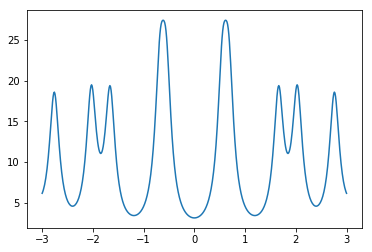

In [270]:
params = {
    'N_z' : 50,
    't' : 1.0,
    'mu' : 2.0,
    'alpha' : 10,
    'V_x' : 0.0
}

H = calc_Hamiltonian(params)

E = np.linspace(-1-params['mu'],5-params['mu'],500)
eta = 10*abs(E[1] - E[0])
dos = calc_direct_dos(E,H,eta = eta)
plt.plot(E,dos)

## Study of variation with $\eta$

In [225]:
params = {
    'N_z' : 50,
    't' : 1.0,
    'mu' : 2.0,
    'alpha' : 0,
    'V_x' : 0
}

dat = []
E = np.linspace(-1,5,500)
eta_scale = abs(E[1]-E[0])
eta_vec = eta_scale*np.logspace(-5,5,50)
for eta in eta_vec:
    dos = calc_direct_dos(E,H,eta = eta)
    dat.append(dos)
dat = np.array(dat) 

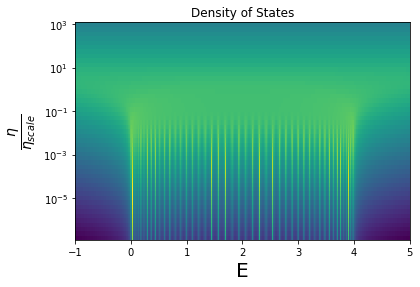

In [242]:
XX,YY = np.meshgrid(E,eta_vec)
plt.yscale("log")
plt.pcolor(XX,YY,np.real(dat),norm=LogNorm(vmin=np.real(dat).min(), vmax=np.real(dat).max()))
plt.xlabel("E",fontsize=20)
plt.ylabel(r"$\frac{\eta}{\eta_{scale}}$",fontsize=20)
plt.title("Density of States")

## Study of variation with $\alpha$

In [277]:
params = {
    'N_z' : 50,
    't' : 1.0,
    'mu' : 2.0,
    'alpha' : 0,
    'V_x' : 0
}


dat = []
E = np.linspace(-1-params['mu'],5-params['mu'],500)
alpha_vec = np.logspace(-5,3,50)
eta = 1*abs(E[1] - E[0])
for alpha in alpha_vec:
    params['alpha'] = alpha
    H = calc_Hamiltonian(params)
    dos = calc_direct_dos(E,H,eta = eta)
    dat.append(dos)
dat = np.array(dat) 

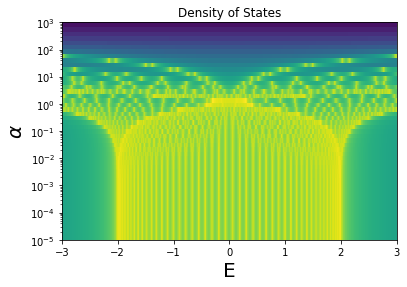

In [278]:
XX,YY = np.meshgrid(E,alpha_vec)
plt.yscale("log")
plt.pcolor(XX,YY,np.real(dat),norm=LogNorm(vmin=np.real(dat).min(), vmax=np.real(dat).max()))
plt.xlabel("E",fontsize=20)
plt.ylabel(r"$\alpha$",fontsize=20)
plt.title("Density of States")

# Study of variation with $V_x$


In [275]:
params = {
    'N_z' : 50,
    't' : 1.0,
    'mu' : 2.0,
    'alpha' : 0,
    'V_x' : 0
}

dat = []
E = np.linspace(-1-params['mu'],5-params['mu'],500)
V_x_vec = np.logspace(-5,3,50)
eta = 1*abs(E[1] - E[0])
for V_x in V_x_vec:
    params['V_x'] = V_x
    H = calc_Hamiltonian(params)
    dos = calc_direct_dos(E,H,eta = eta)
    dat.append(dos)
dat = np.array(dat) 

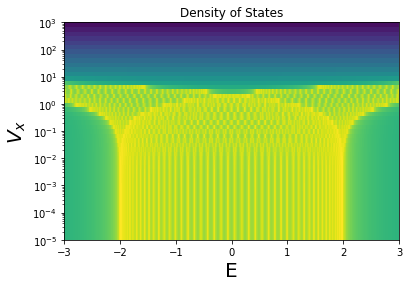

In [276]:
XX,YY = np.meshgrid(E,V_x_vec)
plt.yscale("log")
plt.pcolor(XX,YY,np.real(dat),norm=LogNorm(vmin=np.real(dat).min(), vmax=np.real(dat).max()))
plt.xlabel("E",fontsize=20)
plt.ylabel(r"$V_x$",fontsize=20)
plt.title("Density of States")